# Data Loading

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_excel("/content/shop.xlsx")


In [ ]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# 2D plane so we have to perform on this

In [ ]:
# Keep only relevant columns
df = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Choose the number of clusters k

In [ ]:
 k = 3

 def distance(x1, y1, x2, y2):
  return np.sqrt((x1-x2)**2 + (y1-y2)**2)
 def manhattan_distance(x1, y1, x2, y2):
  return abs(x1-x2) + abs(y1-y2)

In [ ]:
# Step 1: Assign points to nearest centroid
def assign_clusters(data, centroids, k):
    clusters = [[] for _ in range(k)]
    for point in data:
        min_dist = float('inf')
        cluster_index = 0
        for i in range(k):
            dist = distance(point[0], point[1], centroids[i][0], centroids[i][1])
            if dist < min_dist:
                min_dist = dist
                cluster_index = i
        clusters[cluster_index].append(point)
    return clusters

# Assign all the points to the closest cluster centroid

In [ ]:
# Step 2: Compute new centroids
def compute_centroids(clusters):
    new_centroids = []
    for points in clusters:
        points = np.array(points)
        if len(points) == 0:
            # Handle empty cluster edge case
            new_centroids.append([0, 0])
        else:
            new_centroids.append(points.mean(axis=0))
    return np.array(new_centroids)

# Recompute the centroids of newly formed clusters

In [ ]:
# Step 3: Initialize random centroids
centroids = df.sample(n=k, random_state=42).values

In [ ]:
# Step 4: Run iterative optimization
for _ in range(100):
    clusters = assign_clusters(df.values, centroids, k)
    new_centroids = compute_centroids(clusters)
    if np.allclose(centroids, new_centroids):  # convergence check
        break
    centroids = new_centroids

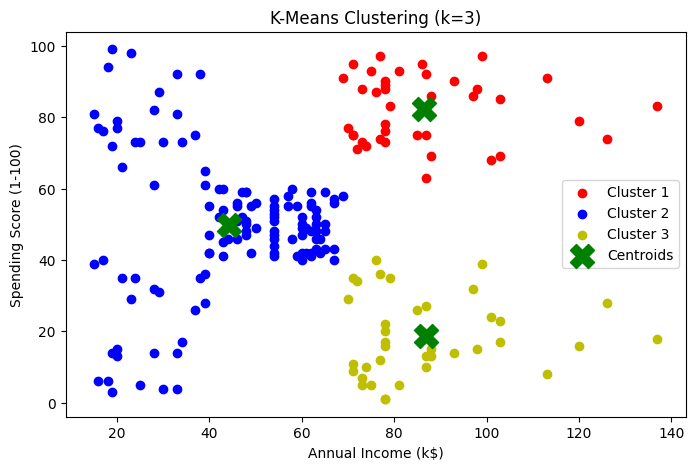

In [ ]:
# Step 5: Plot clusters
colors = ['r', 'b', 'y']
plt.figure(figsize=(8, 5))
for i in range(k):
    points = np.array(clusters[i])
    if len(points) > 0:
        plt.scatter(points[:, 0], points[:, 1], c=colors[i], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='green', marker='X', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering (k=3)')
plt.legend()
plt.show()


In [ ]:

# Step 6: Compute silhouette score
# Convert clusters to 1D label array
labels = np.zeros(len(df))
for i, cluster in enumerate(clusters):
    for point in cluster:
        idx = df[(df.iloc[:, 0] == point[0]) & (df.iloc[:, 1] == point[1])].index
        if len(idx) > 0:
            labels[idx[0]] = i

silhouette_avg = silhouette_score(df, labels)
print(f"Silhouette Score: {silhouette_avg:.4f}")

Silhouette Score: 0.4353


### The Silhouette Score measures how well each data point fits into its assigned cluster compared to other clusters.
### Moderate structure — some overlap between clusters